In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
train=pd.read_csv("train_features.csv")
targets = pd.read_csv("train_targets_scored.csv")
targets_non = pd.read_csv("train_targets_nonscored.csv")
test = pd.read_csv("test_features.csv")
sample_submit = pd.read_csv("sample_submission.csv")

print(f"train shape: {train.shape},targets shape: {targets.shape},targets_non shape: {targets_non.shape},test shape: {test.shape},sample_submit shape: {sample_submit.shape}")

train shape: (23814, 876),targets shape: (23814, 207),targets_non shape: (23814, 403),test shape: (3982, 876),sample_submit shape: (3982, 207)


## Overview: File structure and content

### Training data

In [3]:
## printing the frist 5 rows
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
train.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [5]:
print(f"Number of rows: {train.shape[0] }; Number of columns { train.shape[1] }")

Number of rows: 23814; Number of columns 876


In [6]:
print(f'Number of "g-" features: { len([i  for i in train.columns.tolist() if i.startswith("g-")]) }; Number of "c-" features: { len([i  for i in train.columns.tolist() if i.startswith("c-")])}')


Number of "g-" features: 772; Number of "c-" features: 100


In [7]:
train.dtypes.value_counts()

float64    872
object       3
int64        1
Name: count, dtype: int64

In [8]:
[i for i in train.columns if train[i].dtypes=="object"]

['sig_id', 'cp_type', 'cp_dose']

In [9]:
[i for i in train.columns if train[i].dtypes=="int64"]

['cp_time']

In [10]:
train.isna().sum().sum()

0

It is found that:

* This is a rather wide dataset with almost 900 columns. From the data description we learn that features starting with `“g-”` encode gene expression data (there are 772 of those), and features starting with `“c-”` (100 in total) show cell viability data.

* In addition, we have 3 `“cp_”` features: `cp_type` incidates the sample treatment, while `cp_time` and `cp_dose` encode the duration and dosage of the treatment.

* The `sig_id` is the unique primary key of the sample.

* There are no missing values any cloumns.

Features

* sig_id is the unique sample id
* Features with g- prefix are gene expression features and there are 772 of them (from g-0 to g-771)
* Features with c- prefix are cell viability features and there are 100 of them (from c-0 to c-99)
* cp_type is a binary categorical feature which indicates the samples are treated with a compound or with a control perturbation (trt_cp or ctl_vehicle)
* cp_time is a categorical feature which indicates the treatment duration (24, 48 or 72 hours)
* cp_dose is a binary categorical feature which indicates the dose is low or high (D1 or D2)

### Test data

In [11]:
## printing the frist 5 rows
test.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [12]:
test.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,...,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,48.030136,0.197471,-0.063233,0.137516,0.049622,0.052434,-0.147852,0.010424,-0.166886,-0.168069,...,-0.429980,-0.413215,-0.475762,-0.462484,-0.479196,-0.346450,-0.423905,-0.316387,-0.404859,-0.269792
std,19.414155,1.373476,0.800573,1.066475,0.949972,0.994018,1.204934,0.859452,1.088335,1.666240,...,2.013142,1.995433,1.963440,2.128477,2.149705,1.645669,2.086895,1.655524,1.790883,1.355936
min,24.000000,-5.321000,-4.142000,-6.996000,-3.765000,-6.312000,-8.717000,-6.037000,-8.833000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.502725,-0.552975,-0.431800,-0.465350,-0.445750,-0.576000,-0.521325,-0.477400,-0.526925,...,-0.527725,-0.521850,-0.539375,-0.540450,-0.548175,-0.561525,-0.497050,-0.521125,-0.531075,-0.541950
50%,48.000000,-0.060700,-0.027500,0.073400,-0.036450,-0.047800,-0.012500,-0.009200,0.002150,-0.002900,...,0.010050,0.010900,0.006550,0.017500,0.013450,-0.020000,0.043800,0.020450,0.030750,-0.006250
75%,72.000000,0.454650,0.429950,0.641125,0.423150,0.436050,0.498950,0.495975,0.422500,0.518050,...,0.478900,0.479625,0.442550,0.473300,0.487825,0.454400,0.501050,0.478925,0.487000,0.422800
max,72.000000,10.000000,4.536000,8.227000,10.000000,7.615000,6.356000,6.190000,2.995000,8.007000,...,4.936000,5.300000,3.268000,4.087000,5.290000,5.053000,5.276000,3.074000,3.859000,4.149000


In [13]:
print(f"Number of rows: {test.shape[0] }; Number of columns { test.shape[1] }")

Number of rows: 3982; Number of columns 876


In [14]:
print(f'Number of "g-" features: { len([i  for i in test.columns.tolist() if i.startswith("g-")]) }; Number of "c-" features: { len([i  for i in test.columns.tolist() if i.startswith("c-")])}')


Number of "g-" features: 772; Number of "c-" features: 100


In [15]:
test.isna().sum().sum()

0

It is found that:

* The test data contains the same features as the train data, and has about 4k [3982] rows compared to the 24k [23814] rows of the training data. 4000 samples vs 200 targets is not a very high ratio.

* There are no missing values any cloumns.

### Targets data

In [16]:
## printing the frist 5 rows
targets.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
targets.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,...,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,...,0.015871,0.032384,0.044851,0.114429,0.055283,0.015871,0.084190,0.033025,0.040436,0.035472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
print(f"Number of rows: {targets.shape[0] }; Number of columns { targets.shape[1] }")

Number of rows: 23814; Number of columns 207


It is found that:

* The target response are rather wide, too; with just over 200 different binary outputs. As would be expected, this table is pretty sparse.

* The sig_id can be used to joining the predictors to the targets.

### Non targets

In [19]:
targets_non.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print(f"Number of rows: {targets_non.shape[0] }; Number of columns { targets_non.shape[1] }")

Number of rows: 23814; Number of columns 403


It is found that:

* The additional non-scored targets contain about 400 classes (i.e. columns); twice as many as our scored targets.

* That’s quite a lot of additional information about the drugs themselves. Let’s see whether we’ll find a good application.

### Target sparsity

With so many target classes, MoAs are likely to be rare; and the targets dataframe will be pretty sparse. Here’s the number:

In [21]:
non_zero = targets.drop('sig_id', axis=1).replace(1, pd.NA).isna()

In [22]:
non_zero.shape,targets.shape

((23814, 206), (23814, 207))

In [23]:
non_zero_percent = np.count_nonzero(non_zero) / (non_zero.size) * 100

In [24]:
print("Percentage of non-zero target class values: {:.3f}%".format(non_zero_percent))

Percentage of non-zero target class values: 0.343%


##### Less than half a percent non-zero. Very imbalanced. How about the non-scored targets?

In [25]:
non_zero_targets_non = targets_non.drop('sig_id', axis=1).replace(1, pd.NA).isna()
non_zero_percent_targets_non = np.count_nonzero(non_zero_targets_non) / (non_zero_targets_non.size) * 100
print("Percentage of non-zero non target class values: {:.3f}%".format(non_zero_percent_targets_non))

Percentage of non-zero non target class values: 0.052%


#### Wow; that is a big difference. Almost an order of magnitude more sparse than the already sparse scoring targets.

## Quality check

First, a quick quality check, to make sure that our sig_id values are indeed unique. Results should be zero:u

Why check for unique? coz as mentioned earlier it is unique sample ID for each observation or rows

In [26]:
train.shape[0]-len(train['sig_id'].unique())

0

In [27]:
test.shape[0]-len(test['sig_id'].unique())

0

In [28]:
targets.shape[0]-len(targets['sig_id'].unique())

0

#### Then, another check to confirm whether train and target sig_id values match. Result should be zero, too:

In [29]:
sig_id_matchs=targets['sig_id']==train['sig_id']

In [30]:
sig_id_matchs.unique()

array([ True])

Everything looks as expected; very good.

###  Individual feature visualisations

We start by plotting the distributions of the various predictor and target features individually, before moving on to multi-feature visuals and correlations. Here, we’re dealing with the features group by group.

#### Treatment features:

Those are the predictor features that describe more generally how the sample was treated, in terms of dose, duration; and whether it was a “real” treatment or a control.

These are 3 caregorical features: cp_type, cp_time and cp_dose. Two of them are binary features and other one has 3 unique values, so the cardinality among these features is very less. All of these features have almost identical distribution in trainig set

#### cp_type

In [31]:
train['cp_type'].value_counts()

cp_type
trt_cp         21948
ctl_vehicle     1866
Name: count, dtype: int64

* `cp_type` is a binary categorical feature which indicates the samples are treated with a compound or with a control perturbation (trt_cp or ctl_vehicle).
* It is either means that samples are treated with a compound(trt_cp) or with control pertutbation(ctl_vehicle). Samples treated with control perturbation have no MoAs, thus all of their scored and non-scored target labels are zeros.

<Axes: xlabel='cp_type'>

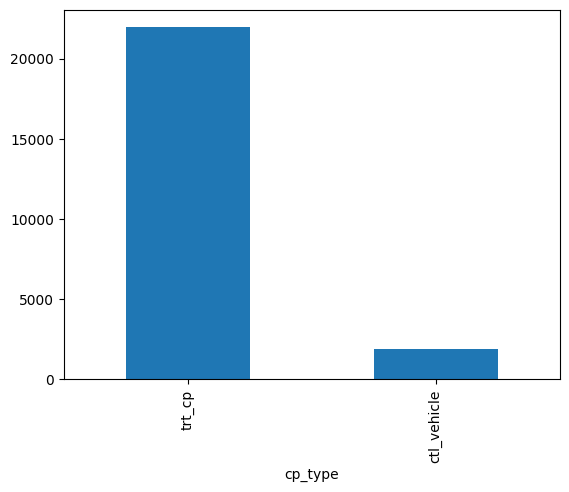

In [32]:
train['cp_type'].value_counts().plot(kind='bar')

#### Interpretation: 
* t
he distribution is imbalance

* The vast majority of treatments are compund treatments (“trt_cp”), compared to about 8% of control pertubation treatements (“ctl_vehicle”). Controls have no MoAs.

#### cp_type

* `cp_dose` is a binary categorical feature which indicates the dose is low or high (D1 or D2)
* It is categorical features in the dataset and it is also a binary feature. It indicates whether the dose of the samples are either low (D1) or high (D2).

<Axes: xlabel='cp_dose'>

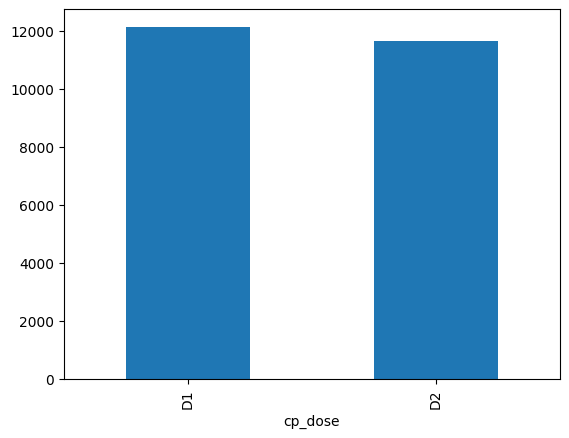

In [33]:
train['cp_dose'].value_counts().plot(kind='bar')

#### Interpretation: 
The distribution is balance

### cp_time

* `cp_time` is a categorical feature which indicates the treatment duration (24, 48 or 72 hours)
* It is categorical feature in the dataset and it has 3 unique values: 24,48,72. It indicates the treatment durations of the samples. Sample counts of different `cp_time` values are very consistent and close to each other in different targets. Sample counts are either extermely close to each other or 48 is slightly higher than others.

<Axes: xlabel='cp_time'>

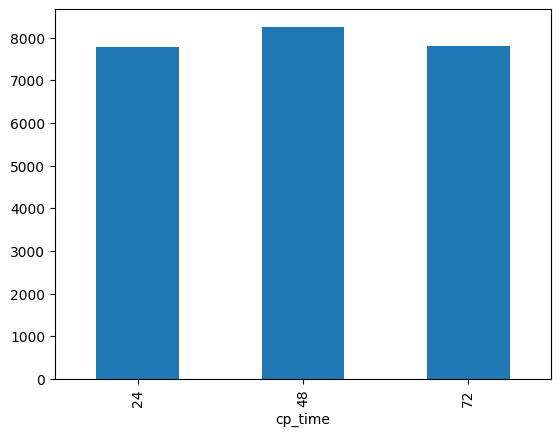

In [34]:
train['cp_time'].value_counts().sort_index().plot(kind='bar')

#### Interpretation: 
The distribution is balance

### Gene Expression features

* Gene expression is the amount and type of proteins that are expressed in a cell at any given point in time. 
* There are 772 gene expression features and they have `g-` prefix ( `g-0` to `g-771`).
* Each gene expression feature represents the expression of one particular gene, so there are 772 individual genes are being monitores in this assay. 

* Those are essentially anonymised features, labelled from “g-0” to “g-771”. Their values are numeric, so let’s look at the densities for the first 4 gene features as an example:

In [35]:
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


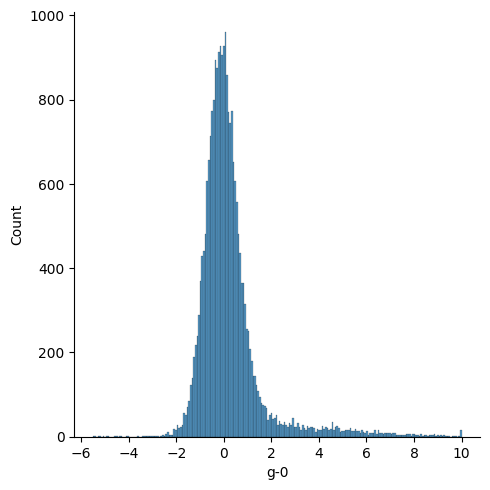

In [36]:
sns.displot(train['g-0'])

In [37]:
train['g-0'] = pd.to_numeric(train['g-0'], errors='coerce')
train['g-1'] = pd.to_numeric(train['g-1'], errors='coerce')
train['g-2'] = pd.to_numeric(train['g-2'], errors='coerce')
train['g-3'] = pd.to_numeric(train['g-3'], errors='coerce')
train['g-4'] = pd.to_numeric(train['g-4'], errors='coerce')
train['g-5'] = pd.to_numeric(train['g-5'], errors='coerce')
train['g-6'] = pd.to_numeric(train['g-6'], errors='coerce')
train['g-7'] = pd.to_numeric(train['g-7'], errors='coerce')
train['g-8'] = pd.to_numeric(train['g-8'], errors='coerce')


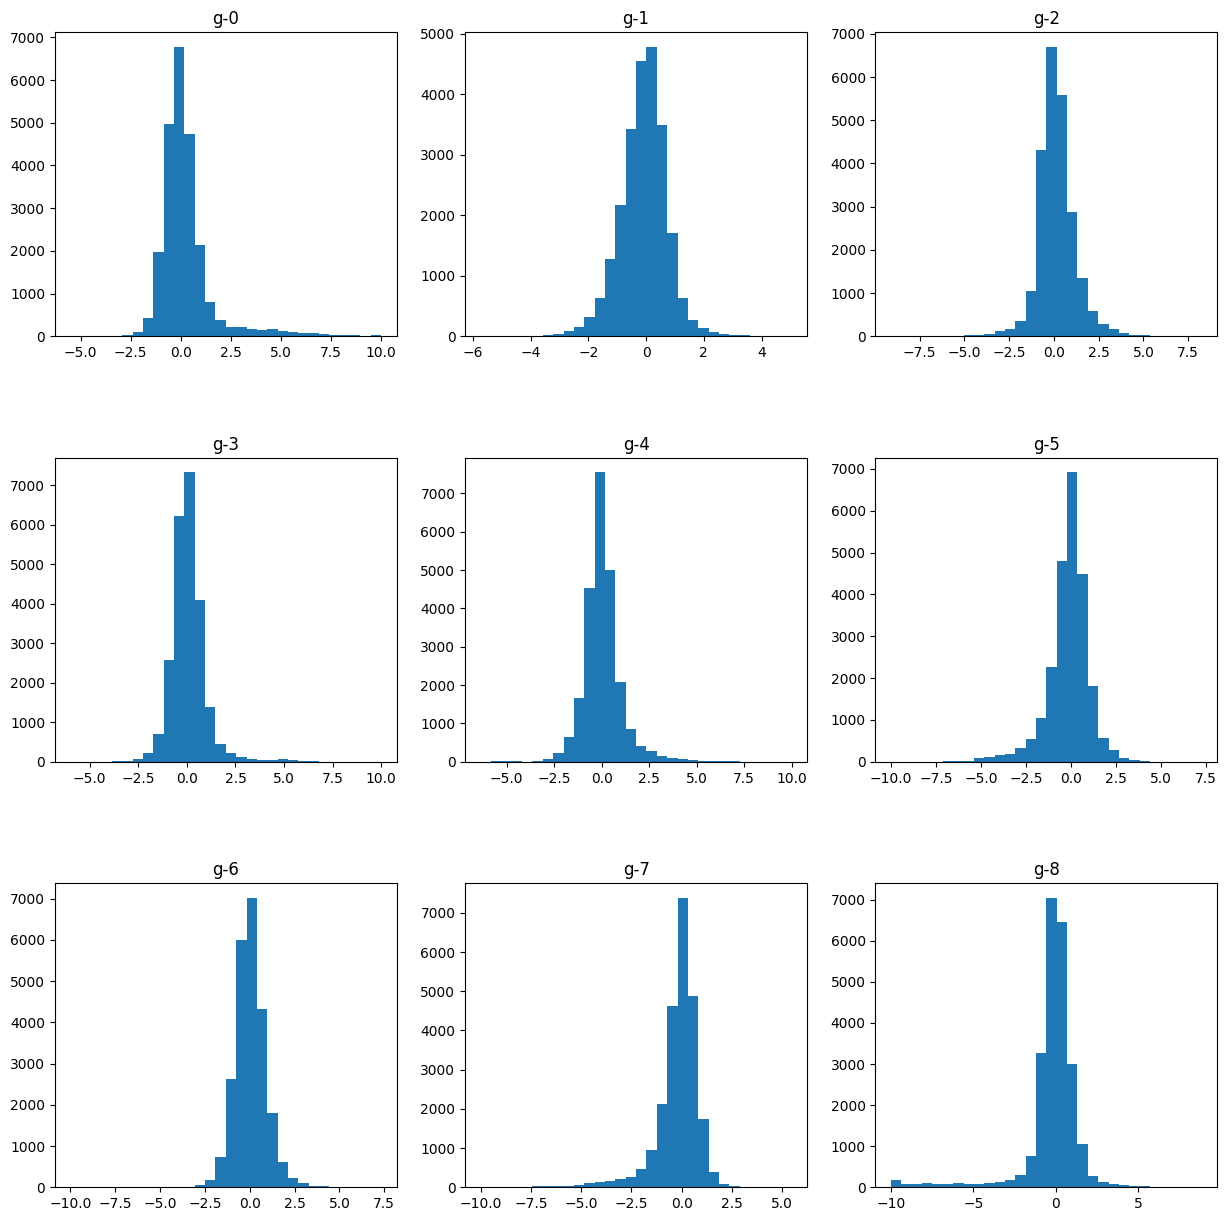

In [38]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i, ax in enumerate(axs):
    # sns.displot(train[f'g-{i}'], ax=ax)
    ax.hist(train[f'g-{i}'], bins=30)
    ax.set_title(f'g-{i}')
    ax.set_xlabel('')
    
plt.subplots_adjust(hspace=0.4)
plt.show()


In [39]:
gene_stats = train.filter(regex='^g-').agg(['min', 'max', 'mean', 'std']).T.reset_index()
gene_stats


,index,min,max,mean,std
0,g-0,-5.513,10.000,0.248366,1.393399
1,g-1,-5.737,5.039,-0.095684,0.812363
2,g-2,-9.104,8.257,0.152253,1.035731
3,g-3,-5.998,10.000,0.081971,0.950012
4,g-4,-6.369,10.000,0.057347,1.032091
...,...,...,...,...,...
767,g-767,-10.000,6.317,-0.076251,1.115477
768,g-768,-4.269,10.000,0.134162,0.951264
769,g-769,-10.000,5.911,-0.128018,1.230636
770,g-770,-10.000,10.000,-0.219210,1.326193


In [40]:
gene_stats.iloc[:,0+1]

0      -5.513
1      -5.737
2      -9.104
3      -5.998
4      -6.369
        ...  
767   -10.000
768    -4.269
769   -10.000
770   -10.000
771   -10.000
Name: min, Length: 772, dtype: float64

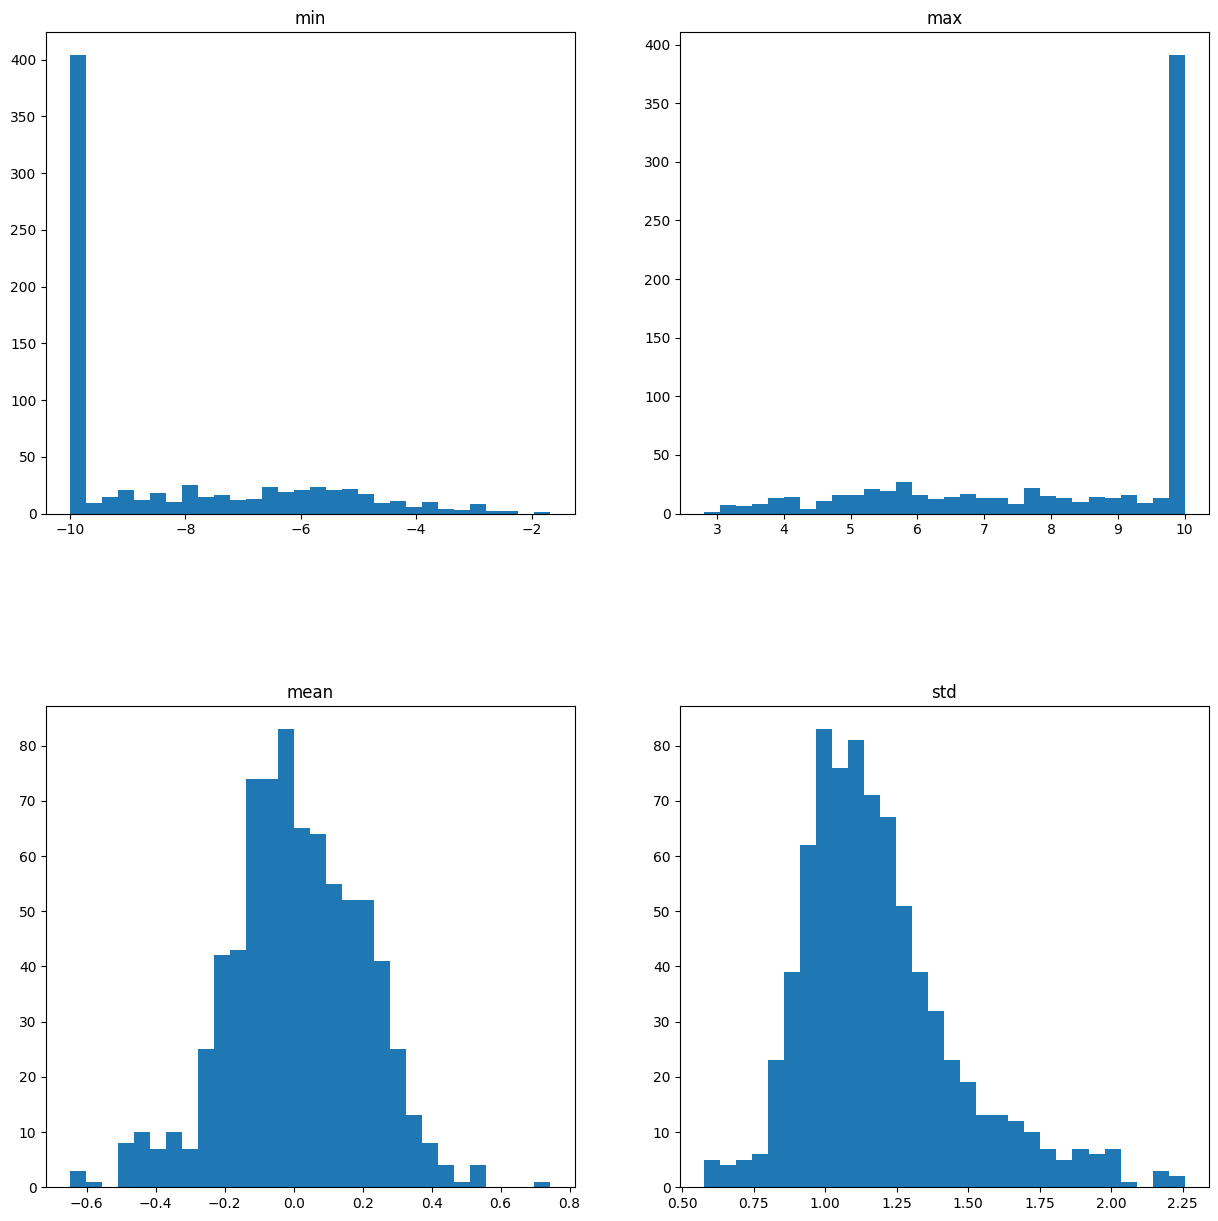

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.flatten()

for i, ax in enumerate(axs):
    # sns.displot(train[f'g-{i}'], ax=ax)
    ax.hist(gene_stats.iloc[:,i+1], bins=30)
    ax.set_title(gene_stats.columns[i+1])
    ax.set_xlabel('')
    
plt.subplots_adjust(hspace=0.4)
plt.show()

### Interpreation:

We find:

* The means are pretty nicely distributed around zero; with standard deviations chiefly between 0.5 and 1.5.

* The min and max are a nice mirror image of each other. There are notable increases around the range of positive/negative 9 - 10.

### Cell Viability features:

Similar to the gene features, the cell viability features are anonymous, labelled from “c-0” to “c-99”; 100 features. Their distributions look as follows:

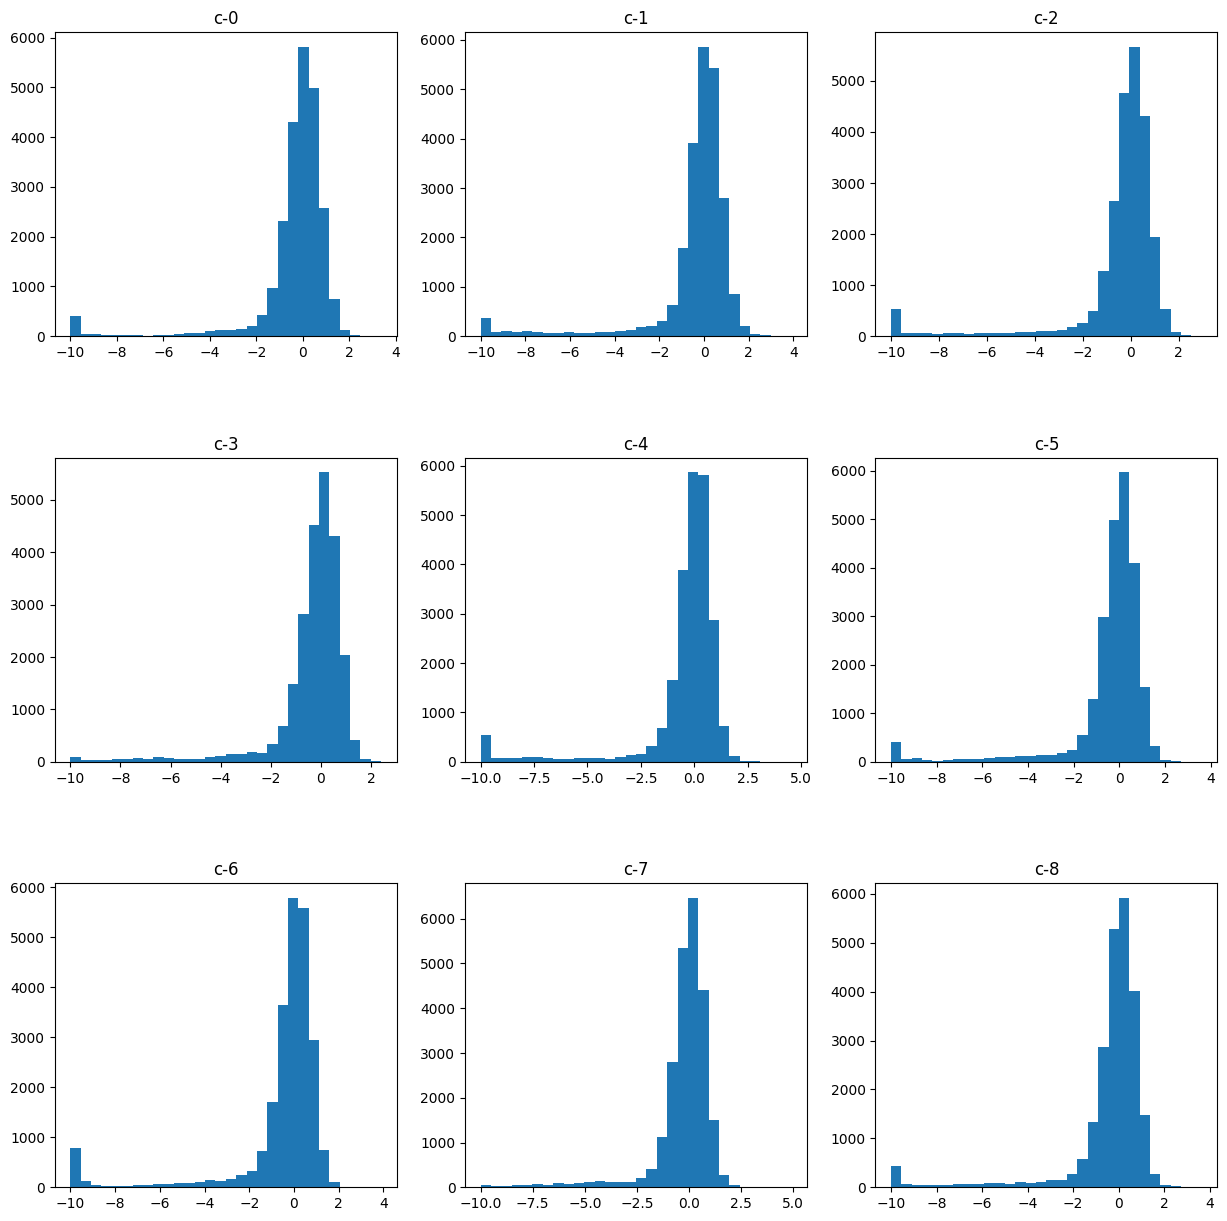

In [42]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i, ax in enumerate(axs):
    # sns.displot(train[f'c-{i}'], ax=ax)
    ax.hist(train[f'c-{i}'], bins=30)
    ax.set_title(f'c-{i}')
    ax.set_xlabel('')
    
plt.subplots_adjust(hspace=0.4)
plt.show()


#### Interpretation 
We find:

* Also reasonably normal, but with notable bumps around values of -10. Are those genuine? Worth looking into this in more detail in the following.

* In contrast to the gene data, none of those distributions goes even near values of positive 10. This might be a sampling effect, though, since both this panel and the gene facets are scaled to the global min & max within each four features.

In [43]:
train[train[f'c-1']<=-4]['c-1']

3        -4.552
14       -5.699
16       -9.950
65       -6.688
76       -8.691
          ...  
23727    -7.865
23776    -8.000
23784    -6.510
23791   -10.000
23802    -8.373
Name: c-1, Length: 1336, dtype: float64

Let’s zoom into the negative tails, and add 2 more features:

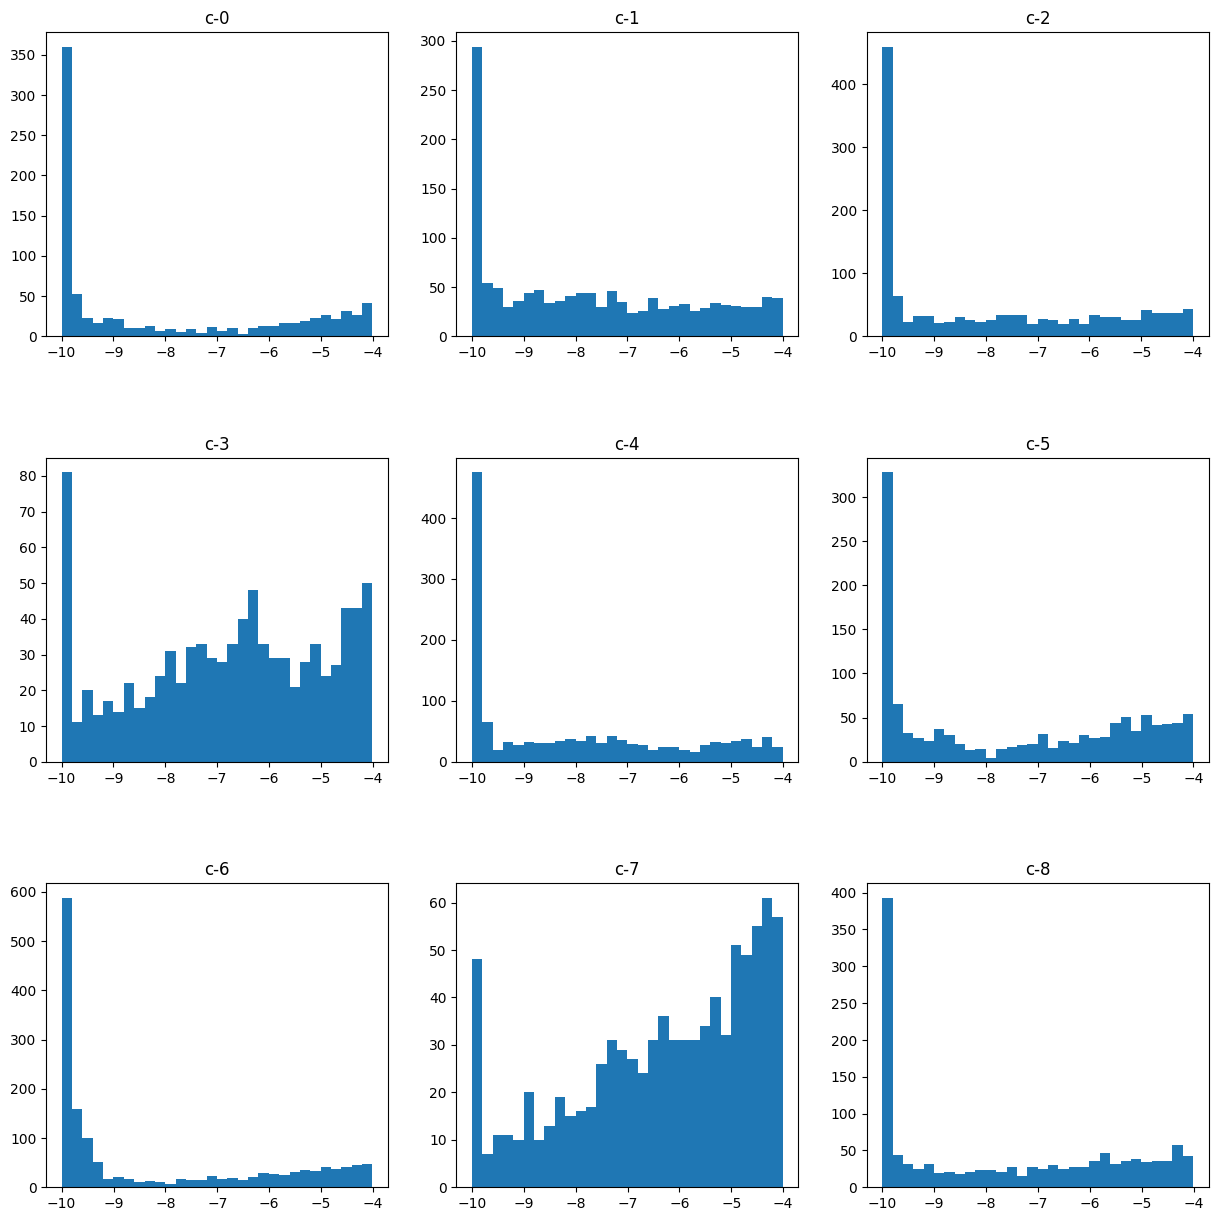

In [44]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i, ax in enumerate(axs):
    # sns.displot(train[f'c-{i}'], ax=ax)
    
    ax.hist(train[train[f'c-{i}']<=-4][f'c-{i}'], bins=30)
    ax.set_title(f'c-{i}')
    ax.set_xlabel('')
    
plt.subplots_adjust(hspace=0.4)
plt.show()


We find:

* Those tails are definitely significant. Even in the cases where the densities don’t rise near -10, the distributions look far from normal.

* Several of the features look almost multimodal. This could become a useful consideration for preprocessing steps.

* Similar to the gene features, once more, let’s derive and plot the distributions of meta features:

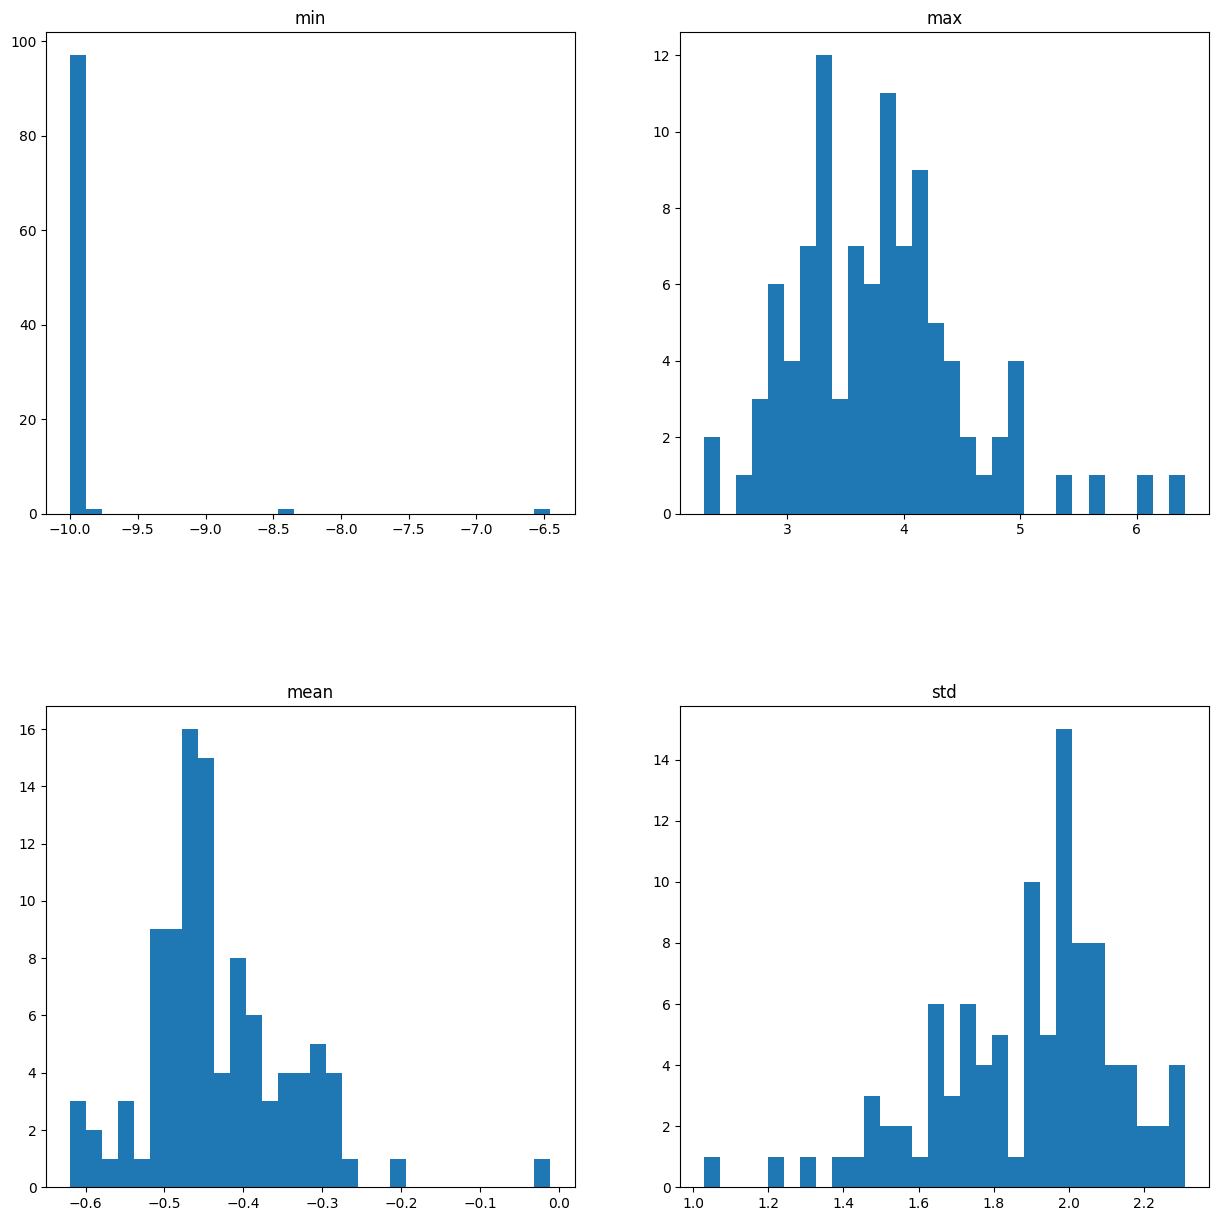

In [45]:
cell_stats = train.filter(regex='^c-').agg(['min', 'max', 'mean', 'std']).T.reset_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.flatten()

for i, ax in enumerate(axs):
    # sns.displot(train[f'g-{i}'], ax=ax)
    ax.hist(cell_stats.iloc[:,i+1], bins=30)
    ax.set_title(cell_stats.columns[i+1])
    ax.set_xlabel('')
    
plt.subplots_adjust(hspace=0.4)
plt.show()

We find:

* What a sharp contrast to the gene meta distributions. Most obviously, the minima are nearly all below -9.5, rising up to the border of -10. The maxima show a much broader distribution between 3 and 5.

* As a consequence of this imbalance, the means are shifted towards negative values around -0.5. Note, that none of the means is above zero. The distribution of standard deviations is shifted from around 1 to around 2, compared to the gene data, with a notable tail towards small values.

### Targets

All the targets are binary columns, indicating whether a certain cell type responds to the drug, or not. Some target classes also measure the type of response; e.g. there is an adrenergic_receptor_agonist class and an adrenergic_receptor_antagonist class. Those should probably not be active for the same sample row.

Our challenge is a multi-label classification problem, and as such the rows (i.e. drug samples) can have multiple MoA’s (i.e. more than one target class can be active). Let’s first look at the distribution of how many target classes can be active at once.

In [46]:
rowstats = targets.drop('sig_id', axis=1).sum(axis=1).to_frame(name='sum')
rowstats

,sum
0,1
1,0
2,3
3,0
4,1
...,...
23809,1
23810,1
23811,0
23812,1


In [47]:
rowstats.value_counts()

sum
1      12532
0       9367
2       1538
3        303
4         55
5         13
7          6
Name: count, dtype: int64

<Axes: xlabel='sum'>

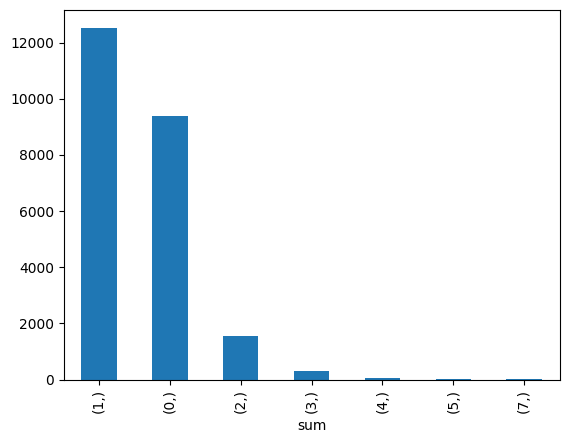

In [48]:
rowstats.value_counts().plot(kind='bar')

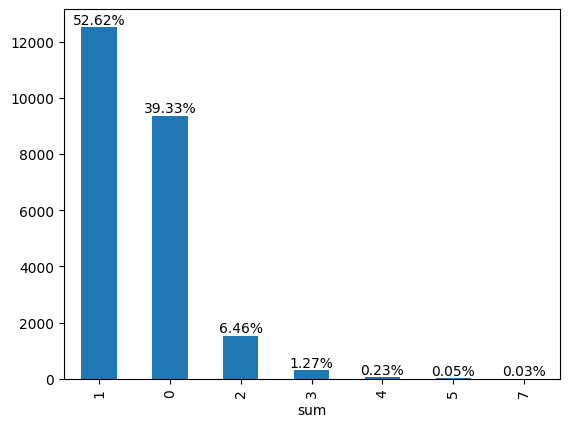

In [49]:
value_counts = rowstats['sum'].value_counts(normalize=True) * 100
value_counts=value_counts.tolist()
ax = rowstats['sum'].value_counts().plot(kind='bar')
for i in ax.containers:
    
    ax.bar_label(i, label_type='edge', labels=[f'{value_counts[inx]:.2f}%' for inx,h in enumerate(i.datavalues)], fontsize=10)
plt.show()


We find:

* About 39% of training samples have no MoA annotations at all (e.g. all the target classes have values of zero). This goes a certain way to explain the sparse target dataframe, if 40% of it are completely empty.

* The largest group, with a bit more than 50% of samples, has exactly 1 MoA annotation (e.g. one class = one value of “1” in its row).

* For more than 1 MoA annotation, we see a tail that extends down to 7 simultaneous MoAs (for 0.03% of cases). Only the case of 2 MoAs is just above 5%, and 3 MoAs is slighly above 1%. Every other case is significantly rarer. Note, that there is no instance with 6 MoAs.

Looking at the targets from a different angle: which classes have the most instances of MoAs in our training data? I.e. which columns have the most 1s among the zeros? For this, we only have to sum all columns. The we plot the resulting distributions and look at the top and bottom classes. Note the logarithmic x-axis on the density plot:

In [50]:
target_sums = targets.drop('sig_id', axis=1).sum().reset_index().rename(columns={'index': 'target', 0: 'sum'})
target_sums


,target,sum
0,5-alpha_reductase_inhibitor,17
1,11-beta-hsd1_inhibitor,18
2,acat_inhibitor,24
3,acetylcholine_receptor_agonist,190
4,acetylcholine_receptor_antagonist,301
...,...,...
201,ubiquitin_specific_protease_inhibitor,6
202,vegfr_inhibitor,170
203,vitamin_b,26
204,vitamin_d_receptor_agonist,39


<Axes: ylabel='Frequency'>

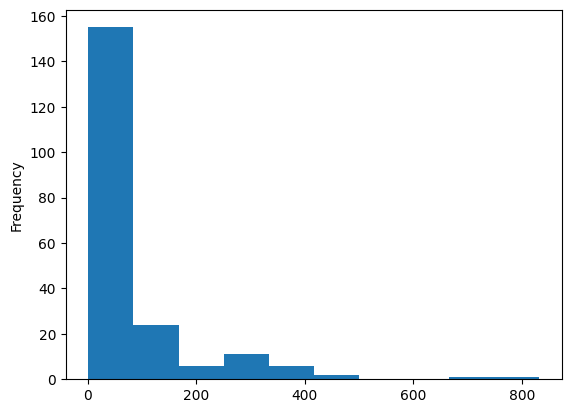

In [51]:
target_sums['sum'].plot(kind='hist')

<Axes: ylabel='Density'>

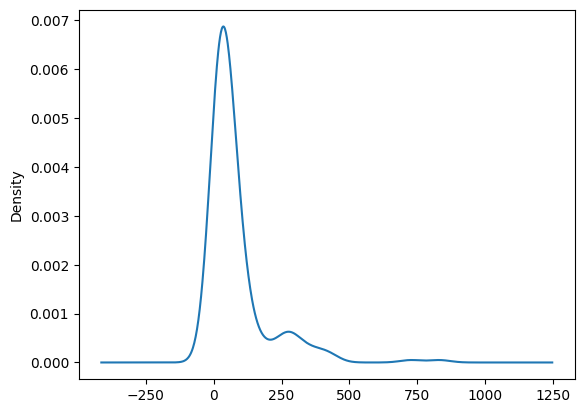

In [52]:
target_sums['sum'].plot(kind='kde')

In [53]:
target_sums_top10=target_sums.sort_values(by='sum',ascending=False).iloc[:10,].reset_index()

In [54]:
target_sums_top10

,index,target,sum
0,136,nfkb_inhibitor,832
1,163,proteasome_inhibitor,726
2,71,cyclooxygenase_inhibitor,435
3,79,dopamine_receptor_antagonist,424
4,177,serotonin_receptor_antagonist,404
5,77,dna_inhibitor,402
6,99,glutamate_receptor_antagonist,367
7,10,adrenergic_receptor_antagonist,360
8,63,cdk_inhibitor,340
9,80,egfr_inhibitor,336


In [55]:
target_sums_last10=target_sums.sort_values(by='sum',ascending=False).iloc[-10:,].reset_index()

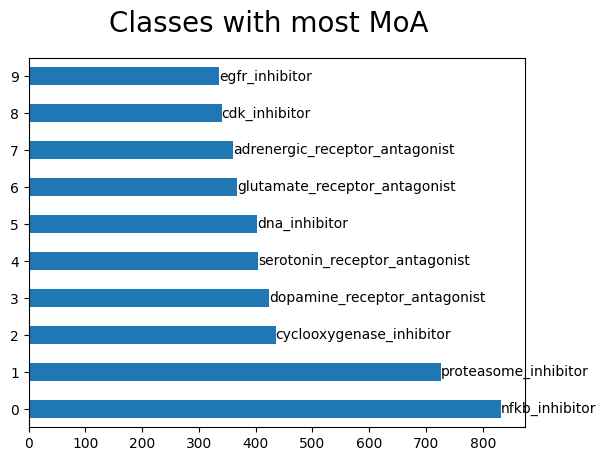

In [56]:
ax = target_sums_top10['sum'].plot(kind='barh')
target_sums_top10_targets=target_sums_top10['target'].tolist()
for i in ax.containers:
   
    ax.bar_label(i, label_type='edge', labels=[f'{target_sums_top10_targets[inx]:s}' for inx,h in enumerate(i.datavalues)], fontsize=10)
    
plt.suptitle('Classes with most MoA', fontsize=20)
plt.show()

Text(0.5, 0.98, 'Classes with most MoA')

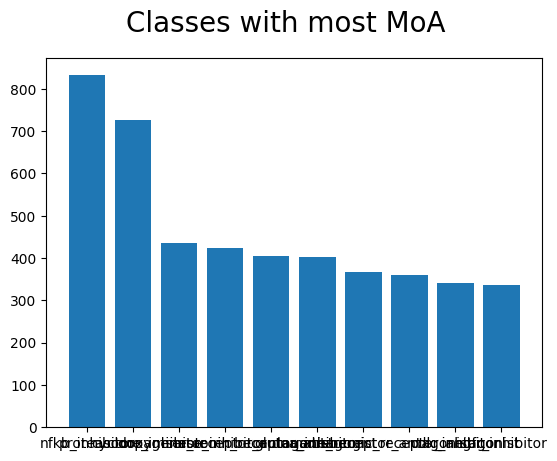

In [57]:
plt.bar(target_sums_top10['target'], target_sums_top10['sum'])
plt.suptitle('Classes with most MoA', fontsize=20)



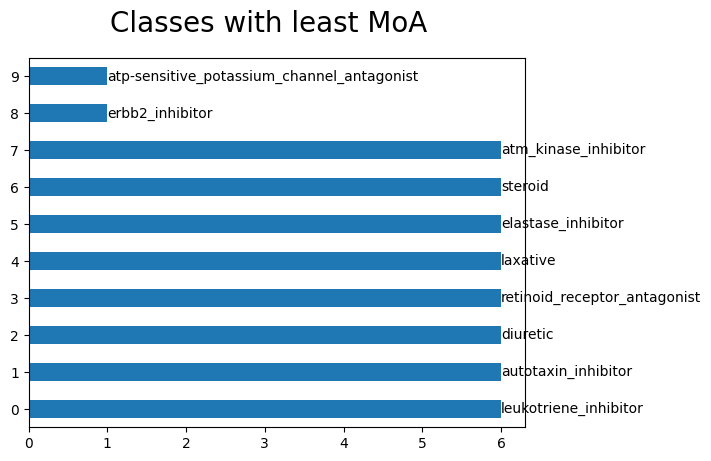

In [58]:
ax = target_sums_last10['sum'].plot(kind='barh')
target_sums_last10_targets=target_sums_last10['target'].tolist()
for i in ax.containers:
   
    ax.bar_label(i, label_type='edge', labels=[f'{target_sums_last10_targets[inx]:s}' for inx,h in enumerate(i.datavalues)], fontsize=10)
    
plt.suptitle('Classes with least MoA', fontsize=20)
plt.show()

We find:

* Most classes have between about 10 and 200 MoAs within the 24k rows of training samples. The maximum number of active rows is just above 800, and the minimum number is 1.

* The rare case of only 1 positive MoA is measured for the two dark-red cases in the bottom right panel. The top scoring classes can be seen in the top right panel. Both extremes feature mostly inhibitors and antagonists.

As so often, this last observation opens up another avenue of investigation. Even though the class names say very little to a layman like me, I can’t help to notice that there’s quite a few “inhibitors”, “antagonists”, “agonists”, and so forth. Let’s try to extract those and look at their frequencies. Not all class names will fall neatly within these groups, so we only look at those that occur more than once. The idea is to use the name of the class and to extract the last word of it. Here are the resulting frequencies:

In [59]:
target_sums['type_of_drug']=target_sums['target'].str.rsplit("_",n=1,expand=True).iloc[:,1]

<Axes: ylabel='type_of_drug'>

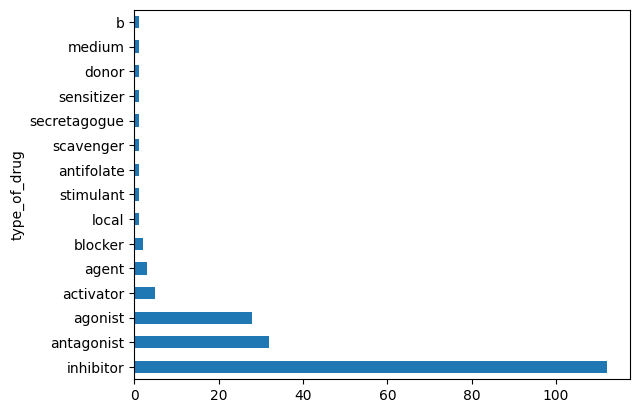

In [60]:
target_sums['type_of_drug'].value_counts().plot(kind='barh')

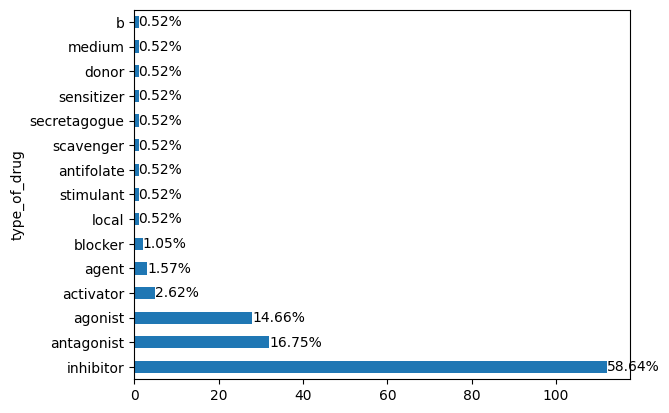

In [61]:
value_counts = target_sums['type_of_drug'].value_counts(normalize=True) * 100
value_counts=value_counts.tolist()
ax = target_sums['type_of_drug'].value_counts().plot(kind='barh')
for i in ax.containers:
    
    ax.bar_label(i, label_type='edge', labels=[f'{value_counts[inx]:.2f}%' for inx,h in enumerate(i.datavalues)], fontsize=10)
plt.show()

We find:

* There’s quite a lot of common ground in the class names: more than 50% are “inhibitors”, “antagonists” and “agonists” are at comparable level of around 15% each, and the remaining three terms are much rarer.

* Everything else, about 12% of classes, have names that don’t fall into these simple patterns.

## Multiple feature interaction visuals
Now that we have a much better idea of how the individual features behave, let’s study their interactions. First, we will look at the different features within the same set, then expand our analysis to the interplay between those groups and their constituents. We will use the same order of feature sets as above.

### Interactions within sets of features
#### Treatment features

In [62]:
train[['cp_type','cp_time','cp_dose']]

,cp_type,cp_time,cp_dose
0,trt_cp,24,D1
1,trt_cp,72,D1
2,trt_cp,48,D1
3,trt_cp,48,D1
4,trt_cp,72,D2
...,...,...,...
23809,trt_cp,24,D2
23810,trt_cp,24,D2
23811,ctl_vehicle,48,D2
23812,trt_cp,24,D1


In [63]:
import pandas as pd
import plotly.express as px

# Load the data (assuming it's already stored in a DataFrame called "train")
# train = ...

# Group by cp_type, cp_dose, and cp_time and count occurrences
grouped = train.groupby(['cp_type', 'cp_dose', 'cp_time']).size().reset_index(name='n')

# Convert cp_time to a factor
grouped['cp_time'] = grouped['cp_time'].astype(str)

# Plotting with Plotly
fig = px.bar(grouped, x='cp_time', y='n', color='cp_time', barmode='group',
             facet_row='cp_dose', facet_col='cp_type',
             category_orders={'cp_time': ['24', '48', '72']},
             labels={'cp_time': 'Treatment Duration', 'n': '', 'cp_dose': 'Dose', 'cp_type': 'Type'})

# Update layout
fig.update_layout(title='Treatment Feature Interactions',
                  title_font=dict(size=14),
                  showlegend=False,
                  plot_bgcolor='white',
                  barmode='group')

# Update axes
fig.update_xaxes(title='', showticklabels=False)
fig.update_yaxes(title='')

# Show the plot
fig.show()


In [64]:
grouped

,cp_type,cp_dose,cp_time,n
0,ctl_vehicle,D1,24,301
1,ctl_vehicle,D1,48,343
2,ctl_vehicle,D1,72,307
3,ctl_vehicle,D2,24,305
4,ctl_vehicle,D2,48,305
5,ctl_vehicle,D2,72,305
6,trt_cp,D1,24,3585
7,trt_cp,D1,48,4011
8,trt_cp,D1,72,3600
9,trt_cp,D2,24,3581


We find:

The resulting picture is consistent with the overall view we saw above. Control treatments are similarly rare across doses and durations.

One noteable difference, however, is the slightly higher percentage of 48-hour treatments for D1 doses (for both control and compound), compared to the much more equally distributed D2 bars.

Now Let's see the correlation btw the gene parameters:

In [68]:
gene_params_corr=train[[i  for i in train.columns.tolist() if i.startswith("g-")]].corr().abs()

In [69]:

# Select upper triangle of correlation matrix
upper = gene_params_corr.where(np.triu(np.ones(gene_params_corr.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
highly_correlated_columns = [column for column in upper.columns if any(upper[column] > 0.95)]
highly_correlated_columns

[]

In [70]:
cell_params_corr=train[[i  for i in train.columns.tolist() if i.startswith("c-")]].corr().abs()
# Select upper triangle of correlation matrix
upper_cell = cell_params_corr.where(np.triu(np.ones(cell_params_corr.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
highly_correlated_cell_columns = [column for column in upper.columns if any(upper[column] > 0.95)]
highly_correlated_cell_columns

[]

### Non-scored targets
So far, we have been largely ignoring the non-scored target data provided in train_targets_nonscored.csv, other than peeking into it and noticing its sparsity at the beginning. Let’s take a bit of time now to have a closer look at this dataset.

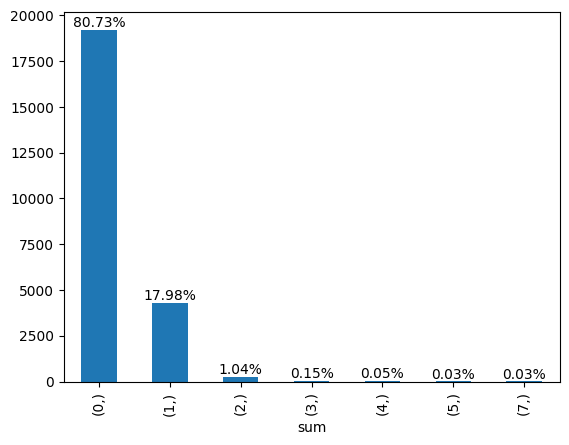

In [75]:
rowstats = targets_non.drop('sig_id', axis=1).sum(axis=1).to_frame(name='sum')
# rowstats.value_counts().plot(kind='bar')

value_counts = rowstats.value_counts(normalize=True) * 100
value_counts=value_counts.tolist()
ax = rowstats.value_counts().plot(kind='bar')
for i in ax.containers:
    
    ax.bar_label(i, label_type='edge', labels=[f'{value_counts[inx]:.2f}%' for inx,h in enumerate(i.datavalues)], fontsize=10)
plt.show()

In [77]:
target_sums = targets_non.drop('sig_id', axis=1).sum().reset_index().rename(columns={'index': 'target', 0: 'sum'})
# target_sums
targets_non_sums_top10=target_sums.sort_values(by='sum',ascending=False).iloc[:10,].reset_index()
targets_non_sums_last10=target_sums.sort_values(by='sum',ascending=False).iloc[-10:,].reset_index()


In [80]:
targets_non_sums_last10

,index,target,sum
0,348,sterol_regulatory_element_binding_protein_(sre...,0
1,182,hsp_inducer,0
2,168,h+_k+-atpase_inhibitor,0
3,344,stearoyl-coa_desaturase_inhibitor,0
4,99,deubiquitinase_inhibitor,0
5,341,src_activator,0
6,95,cysteine_peptidase_inhibitor,0
7,262,noradrenaline_uptake_inhibitor,0
8,75,cell_proliferation_inhibitor,0
9,265,ntpdase_inhibitor,0


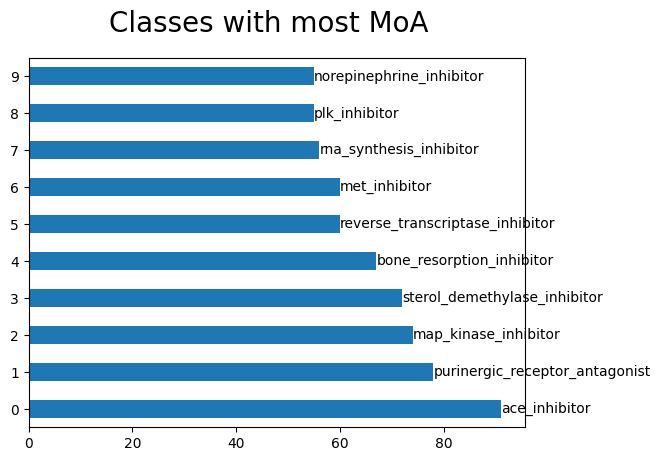

In [78]:
ax = targets_non_sums_top10['sum'].plot(kind='barh')
targets_non_sums_top10_targets=targets_non_sums_top10['target'].tolist()
for i in ax.containers:
   
    ax.bar_label(i, label_type='edge', labels=[f'{targets_non_sums_top10_targets[inx]:s}' for inx,h in enumerate(i.datavalues)], fontsize=10)
    
plt.suptitle('Classes with most MoA', fontsize=20)
plt.show()

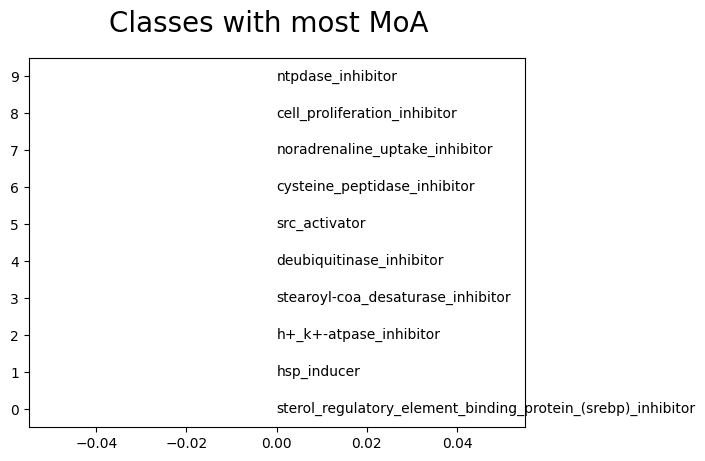

In [79]:
ax = targets_non_sums_last10['sum'].plot(kind='barh')
targets_non_sums_last10_targets=targets_non_sums_last10['target'].tolist()
for i in ax.containers:
   
    ax.bar_label(i, label_type='edge', labels=[f'{targets_non_sums_last10_targets[inx]:s}' for inx,h in enumerate(i.datavalues)], fontsize=10)
    
plt.suptitle('Classes with most MoA', fontsize=20)
plt.show()

In [81]:
target_sums['type_of_drug']=target_sums['target'].str.rsplit("_",n=1,expand=True).iloc[:,1]

<Axes: ylabel='type_of_drug'>

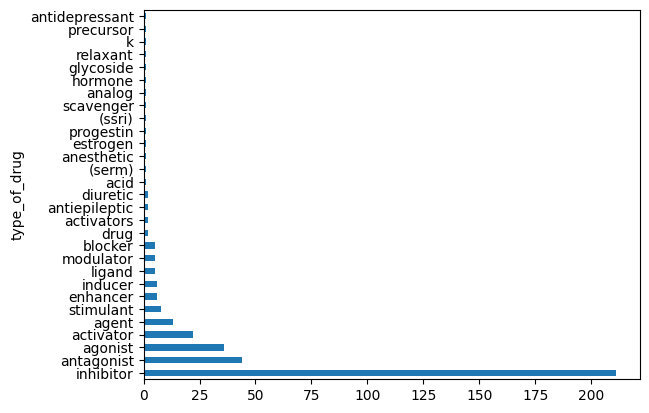

In [82]:
target_sums['type_of_drug'].value_counts().plot(kind='barh')

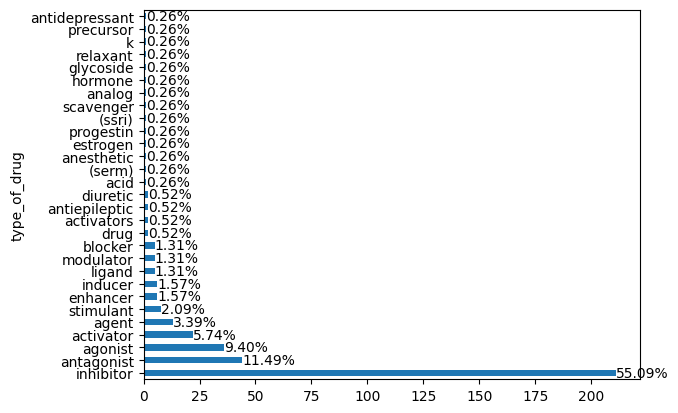

In [83]:
value_counts = target_sums['type_of_drug'].value_counts(normalize=True) * 100
value_counts=value_counts.tolist()
ax = target_sums['type_of_drug'].value_counts().plot(kind='barh')
for i in ax.containers:
    
    ax.bar_label(i, label_type='edge', labels=[f'{value_counts[inx]:.2f}%' for inx,h in enumerate(i.datavalues)], fontsize=10)
plt.show()

We find:

Due to the factor 2 larger number of classes, we have a few more cases of target class types (i.e. for now the final terms in the class name) with more than 1 occurence. However, the dominating types remain the same; with “inhibitor” contributing more than 50%.

Antagonists remain more common than agonists. There’s also the odd spelling variation, e.g. “activators” instead of “activator”.

### Let's try do some extra bi variant analysis:

In [89]:
# list the columns 
# list(features)
# get all the gene features and cell features
common  = ['sig_id',
 'cp_type',
 'cp_time',
 'cp_dose']


genes = list(filter(lambda x : "g-" in x  , list(train)))

cells = list(filter(lambda x : "c-" in x  , list(train)))

In [90]:
features = train

#### gene features vs common features (cp_type , cp_dose, cp_duration )

In [91]:
# g_mean and  c_mean and g_mean for analysis.
features['c_mean'] = features[cells].mean(axis =1)
features['g_mean'] = features[genes].mean(axis =1)

C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_44112\920118596.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\kiran.franklin\Anaconda3\envs\omics\lib\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_44112\920118596.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` 

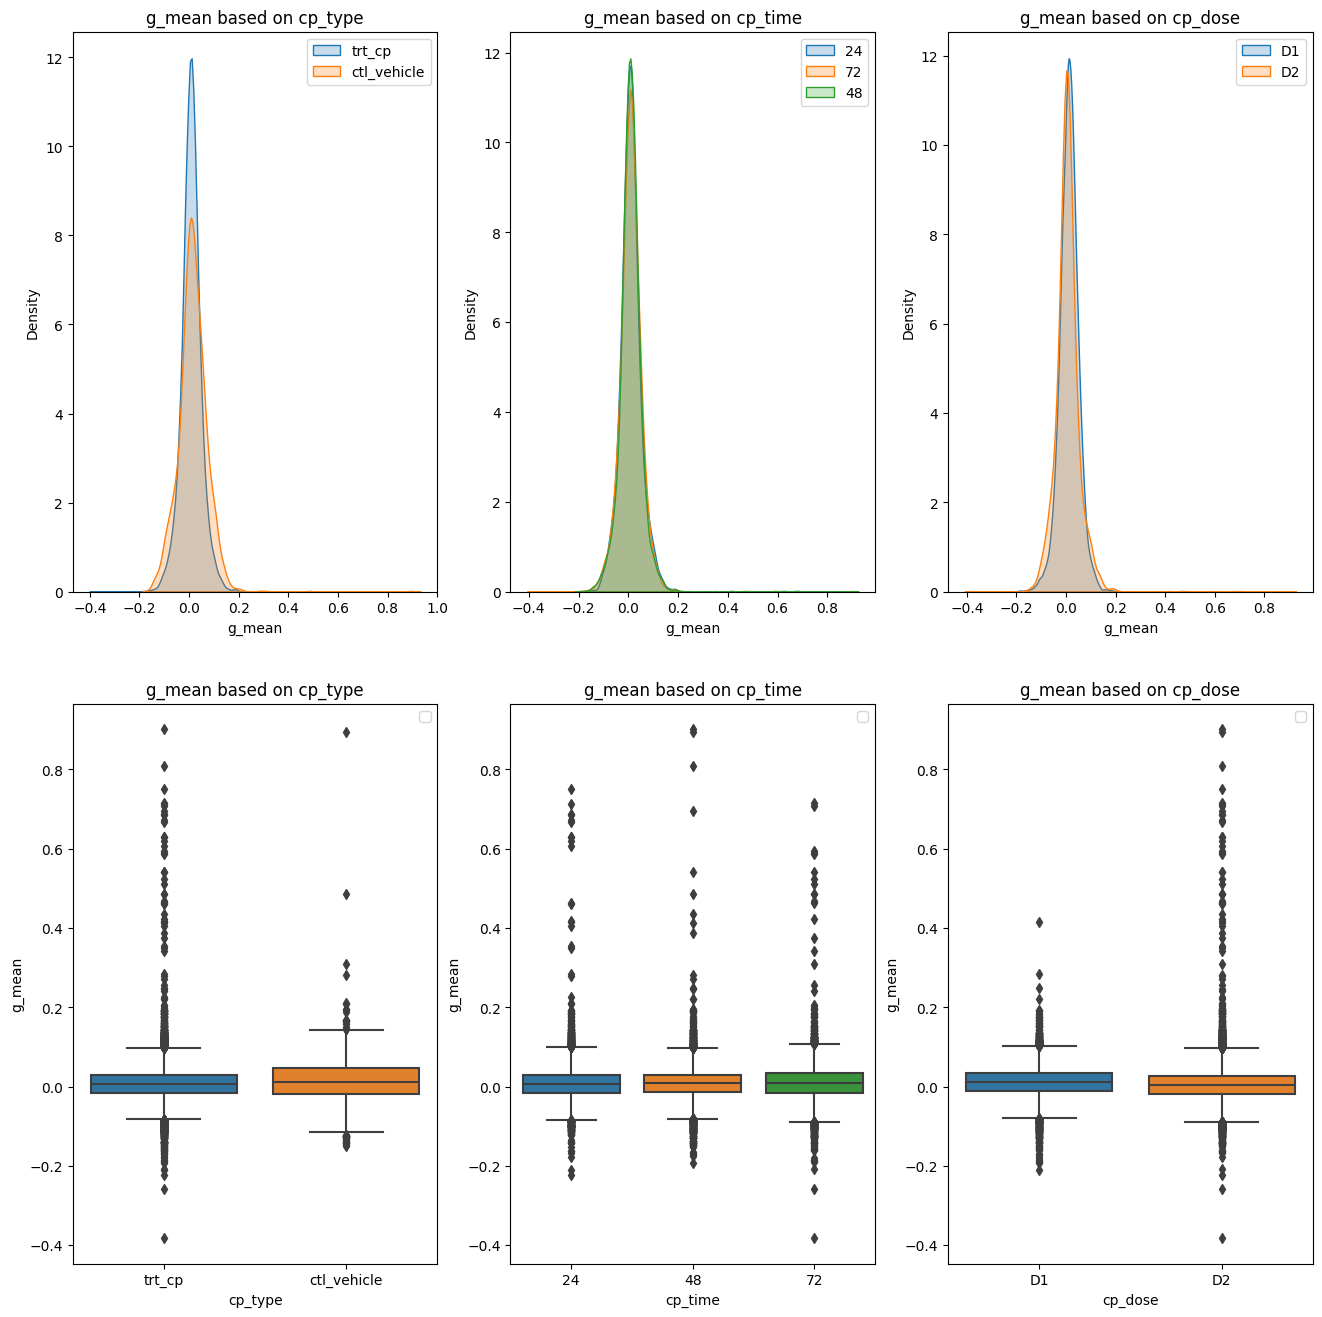

In [92]:
fig, axs = plt.subplots(figsize=(16,16) , nrows=2 , ncols =3)
plt.subplot(231)
for i in features.cp_type.unique():
    sns.distplot(features[features['cp_type']==i]['g_mean'],label=i, hist=False, kde_kws={"shade": True})
plt.title(f"g_mean based on cp_type")
plt.legend()

plt.subplot(232)
for i in features.cp_time.unique():
    sns.distplot(features[features['cp_time']==i]['g_mean'],label=i, hist=False, kde_kws={"shade": True})
plt.title(f"g_mean based on cp_time")
plt.legend()

plt.subplot(233)
for i in features.cp_dose.unique():
    sns.distplot(features[features['cp_dose']==i]['g_mean'],label=i, hist=False, kde_kws={"shade": True})
plt.title(f"g_mean based on cp_dose")
plt.legend()

plt.subplot(234)
sns.boxplot( x = features['cp_type'] , y = features['g_mean'] )
plt.title(f"g_mean based on cp_type")
plt.legend()

plt.subplot(235)
sns.boxplot( x = features['cp_time'] , y = features['g_mean'] )
plt.title(f"g_mean based on cp_time")
plt.legend()

plt.subplot(236)
sns.boxplot( x = features['cp_dose'] , y = features['g_mean'] )
plt.title(f"g_mean based on cp_dose")
plt.legend()

plt.show()

##### cell vs common vars analysis

C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_44112\332979692.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\kiran.franklin\Anaconda3\envs\omics\lib\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_44112\332979692.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` 

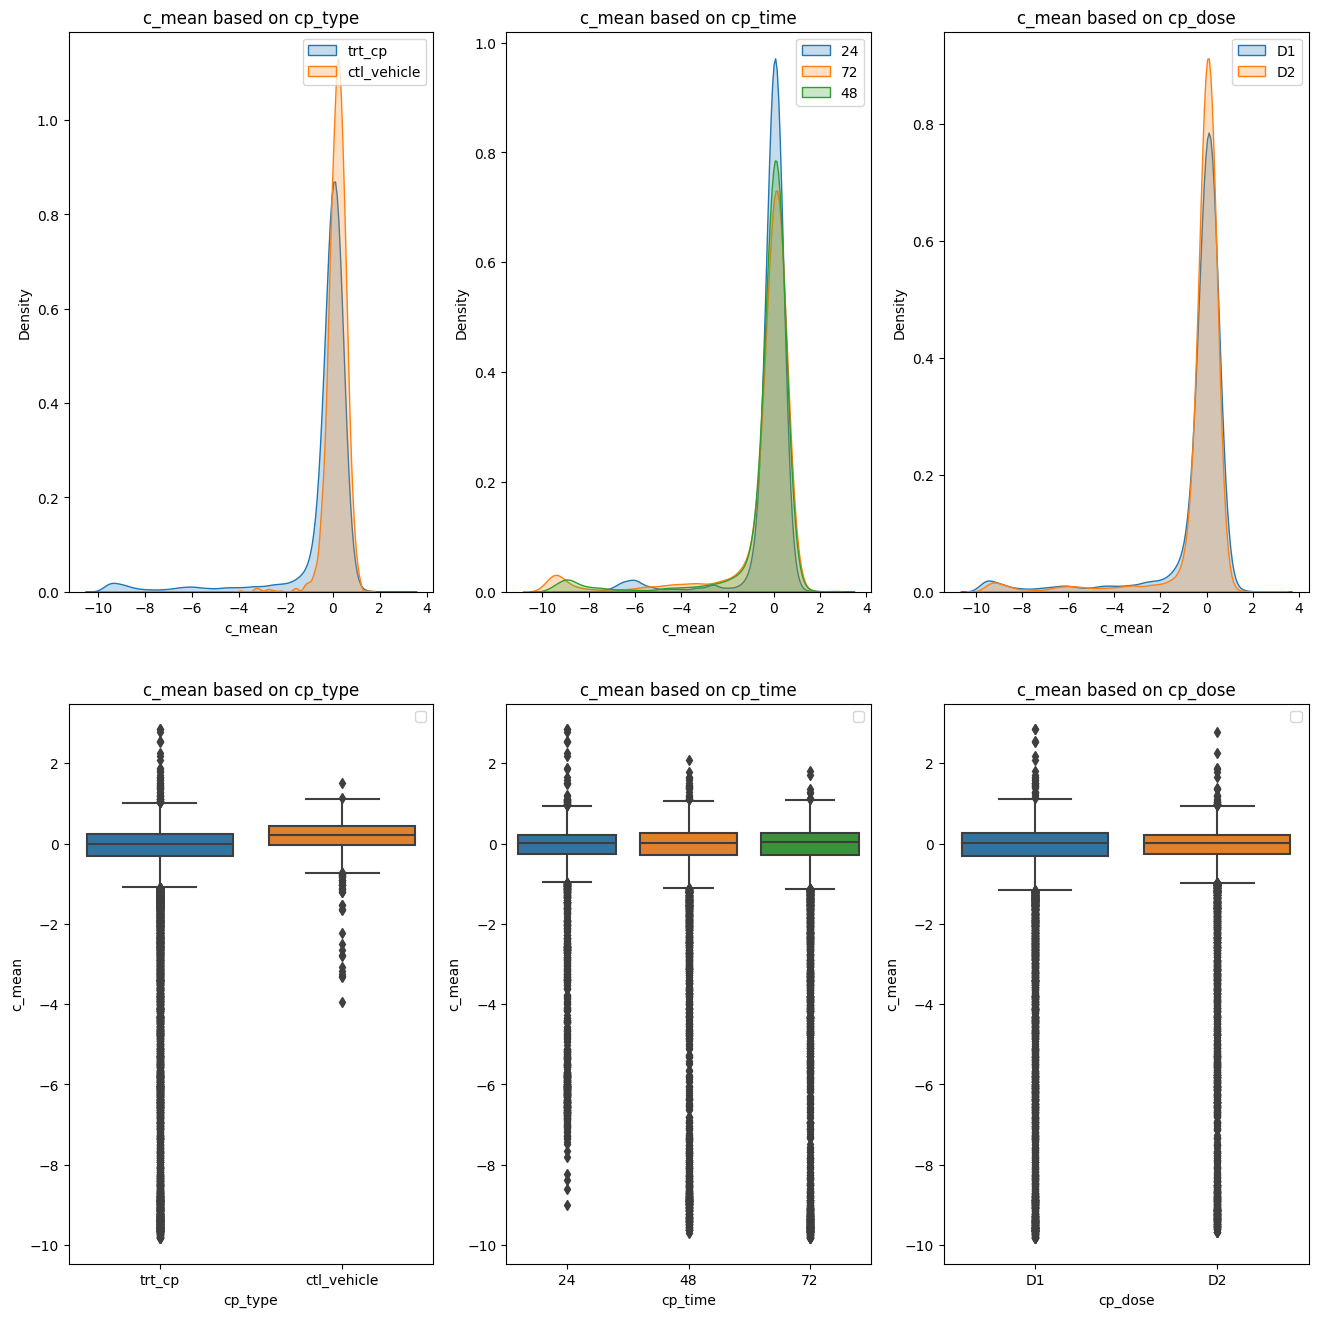

In [93]:
fig, axs = plt.subplots(figsize=(16,16) , nrows=2 , ncols =3)
plt.subplot(231)
for i in features.cp_type.unique():
    sns.distplot(features[features['cp_type']==i]['c_mean'],label=i, hist=False, kde_kws={"shade": True})
plt.title(f"c_mean based on cp_type")
plt.legend()

plt.subplot(232)
for i in features.cp_time.unique():
    sns.distplot(features[features['cp_time']==i]['c_mean'],label=i, hist=False, kde_kws={"shade": True})
plt.title(f"c_mean based on cp_time")
plt.legend()

plt.subplot(233)
for i in features.cp_dose.unique():
    sns.distplot(features[features['cp_dose']==i]['c_mean'],label=i, hist=False, kde_kws={"shade": True})
plt.title(f"c_mean based on cp_dose")
plt.legend()

plt.subplot(234)
sns.boxplot( x = features['cp_type'] , y = features['c_mean'] )
plt.title(f"c_mean based on cp_type")
plt.legend()

plt.subplot(235)
sns.boxplot( x = features['cp_time'] , y = features['c_mean'] )
plt.title(f"c_mean based on cp_time")
plt.legend()

plt.subplot(236)
sns.boxplot( x = features['cp_dose'] , y = features['c_mean'] )
plt.title(f"c_mean based on cp_dose")
plt.legend()

plt.show()

as seen in univariate analysis for cells and genes cells have negative tail and genes have a positive tail.

The distribution on the basis of common vars are simmilar with slight diffrence in negative(extreme) values for cells and positive (extreme) values for genes

##### Target vs commom vars

In [95]:
feat_target  = pd.merge(features , targets , how = "inner" , on = ['sig_id','sig_id'])
target_features=targets.drop(['sig_id'],axis=1)
target_cols = list(target_features)
feat_target["target_sum"] = feat_target[target_cols].sum(axis =1)
feat_target.drop("sig_id" , axis = 1, inplace = True)

C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_44112\1652163229.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



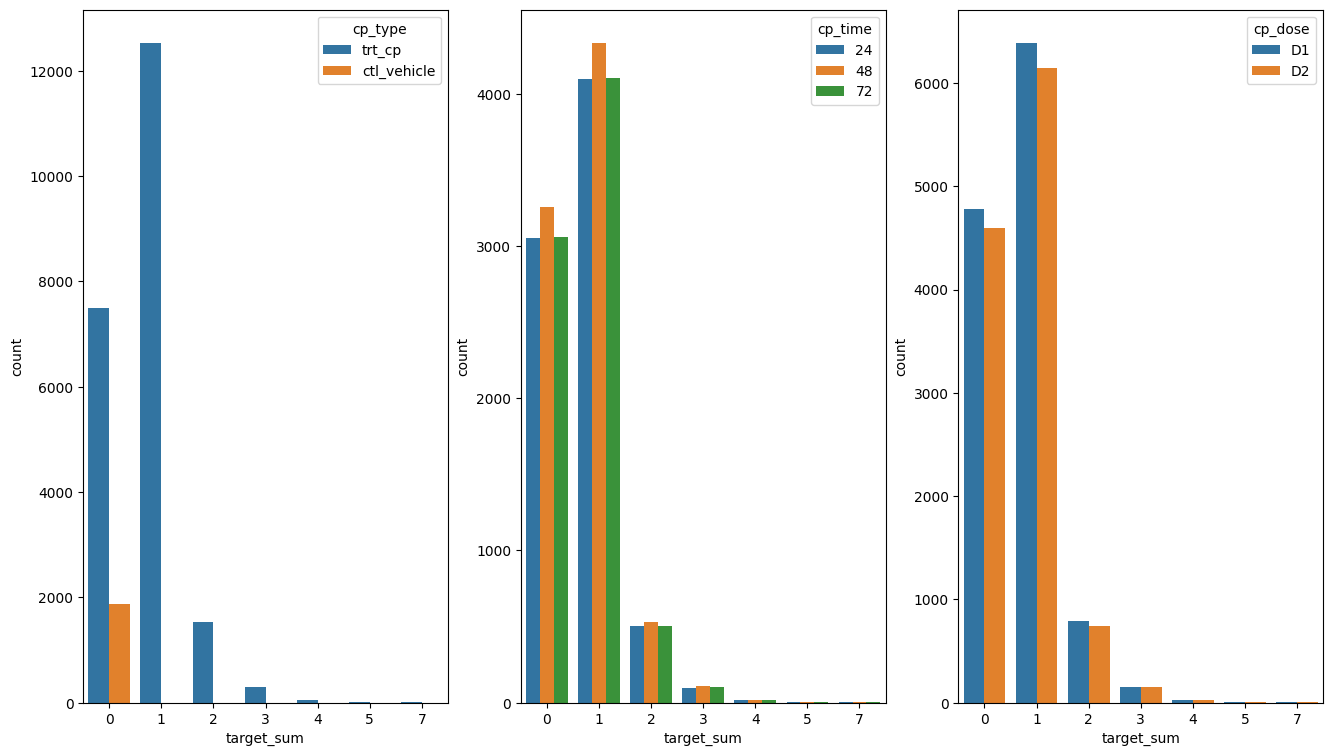

In [96]:
fig,ax = plt.subplots(figsize=(16,9))
plt.subplot(131)
sns.countplot(x = 'target_sum' , hue= 'cp_type', data = feat_target)
plt.subplot(132)
sns.countplot(x = 'target_sum' , hue= 'cp_time', data = feat_target)
plt.subplot(133)
sns.countplot(x = 'target_sum' , hue= 'cp_dose', data = feat_target)

plt.show()

* as expected ctrl_vehicle doesnt have any target annotation
* most of the obs have one target annotations.

#### Target vs g_mean and c_mean

C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_44112\2267056063.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



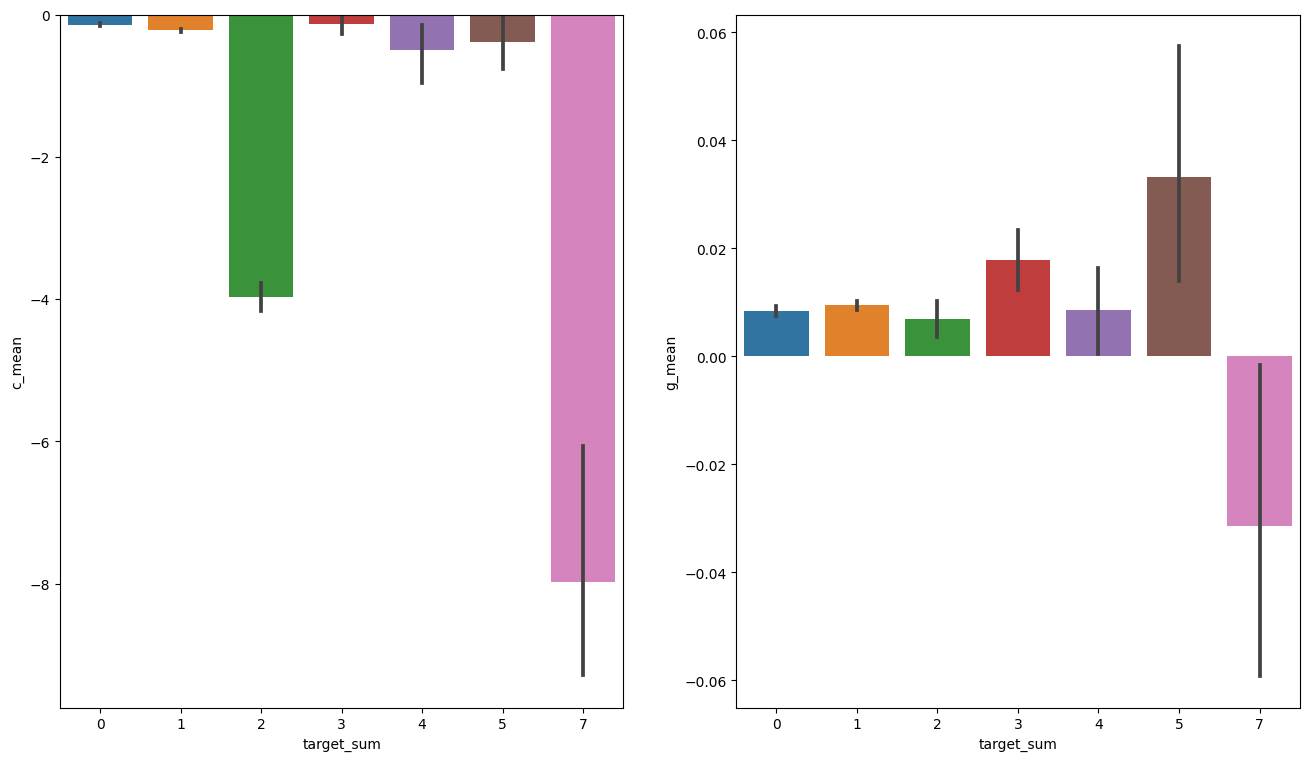

In [97]:
fig,ax = plt.subplots(figsize=(16,9))
plt.subplot(121)
sns.barplot(x = 'target_sum' , y= 'c_mean', data = feat_target)
plt.subplot(122)
sns.barplot(x = 'target_sum' , y= 'g_mean', data = feat_target)

plt.show()

Interesting!!! , For cells the negative tails are of-course in effect but for genes only 7 positive has a negative g_mean which is worth instigating further!!

## Dimensionality reduction via PCA

Given the notable amount of correlations in the gene and, especially, the cell features, let’s test some dimensionality reduction methods, to see by how much we could reduce our feature space.

Here, we will focus on principal component analysis (PCA). PCA is essentially a rotation of the parameter space so that the new axes (the “principal components” aka PC) are orthogonal and align with the directions of maximum variance. We’ll start with the gene features, then look at the cell features.